In [368]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [369]:
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculumCFM import GenerateDataCurriculumCFM
from PFNExperiments.LinearRegression.Models.Transformer_CNF import TransformerCNFConditionalDecoder
from PFNExperiments.Training.FlowMatching.CFMLossOT2 import CFMLossOT2
from PFNExperiments.LatentFactorModels.Training.TrainerCurriculumCNF_LatentFactor import TrainerCurriculumCNF_LatentFactor
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from PFNExperiments.LinearRegression.Models.ModelToPosteriorCNF import ModelToPosteriorCNF
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC
from PFNExperiments.Evaluation.Evaluate import Evaluate, results_dict_to_data_x_tuple, result_dict_to_latent_variable_convert_mu_sigma_to_beta, results_dict_to_data_x_tuple_transpose

In [370]:
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_diagonal, make_gmm_program_diagonal_batched
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison


In [371]:
N = 10
P = 4
K = 3
BATCH_SIZE = 1024
N_EPOCHS = 1
N_SAMPLES_PER_EPOCH = 500_000
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH//BATCH_SIZE

In [372]:
curriculum = Curriculum(max_iter=int(N_EPOCHS*N_BATCHES_PER_EPOCH*BATCH_SIZE*0.5))
curriculum.add_param_list([
    ("n", curriculum.constant_scheduler(N)),
    ("p", curriculum.constant_scheduler(P)),
    ("k", curriculum.constant_scheduler(K)),
    ("batch_size", curriculum.constant_scheduler(BATCH_SIZE)),
    ("a1", curriculum.constant_scheduler(5.0)),
    ("b1", curriculum.constant_scheduler(2.0)),
    ("dirichlet_beta", curriculum.constant_scheduler(1.0)),
    ("lambda1", curriculum.constant_scheduler(3.0))
])
#curriculum.plot_all_schedules()

In [373]:
data_generator = GenerateDataCurriculumCFM(
    pprogram_maker= make_gmm_program_diagonal_batched,
    curriculum= curriculum,
)

pprogram_covariates_train is None, using pprogram_covariates instead
pprogram_covariates_val is None, using pprogram_covariates instead
pprogram_covariates_test is None, using pprogram_covariates instead


In [374]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
    )

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 49971200 and 24985600 respectively


In [375]:
sample_batch = next(iter(epoch_loader[0][0]))

In [376]:
for key, value in sample_batch.items():
    print(key, value.shape)

phi torch.Size([1024, 3])
mu torch.Size([1024, 12])
sigma_squared torch.Size([1024, 12])
z torch.Size([1024, 10])
x torch.Size([1024, 10, 4])
beta torch.Size([1024, 24])
time torch.Size([1024])
base_sample_beta torch.Size([1024, 24])


####################################################################################################
Epoch 0


100%|██████████| 10/10 [00:00<00:00, 11.94it/s]


{'X': {'mean': tensor(0.0017), 'variance': tensor(3.6286), 'min': tensor(-37.9607), 'max': tensor(25.9002), 'mean_mean': tensor([ 0.0016,  0.0203, -0.0003, -0.0147]), 'variance_mean': tensor([2.1063, 2.1322, 1.9874, 1.9355]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2493), 'variance': tensor(1.5763), 'min': tensor(-34.9518), 'max': tensor(23.1483), 'mean_mean': tensor(0.2493), 'variance_mean': tensor(1.6434), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3357, 0.3318, 0.3326])
Variance: tensor([0.0551, 0.0552, 0.0563])
Min: tensor([2.4037e-04, 4.0376e-05, 3.4481e-04])
Max: tensor([0.9844, 0.9950, 0.9848])
Mean of means: 0.3333333730697632
Mean of variances: 0.08325959742069244
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([-0.0143,  0.0369, -0.0276, -0.0109, -0.0055, -0.0202,  0.0415, -0.0069,
        -0.0016, -0.0289, -0.0102,  0.0176])
Variance: tensor([2.8708, 2.7095, 2.8758, 3.1073, 3.1820, 3.7238, 3

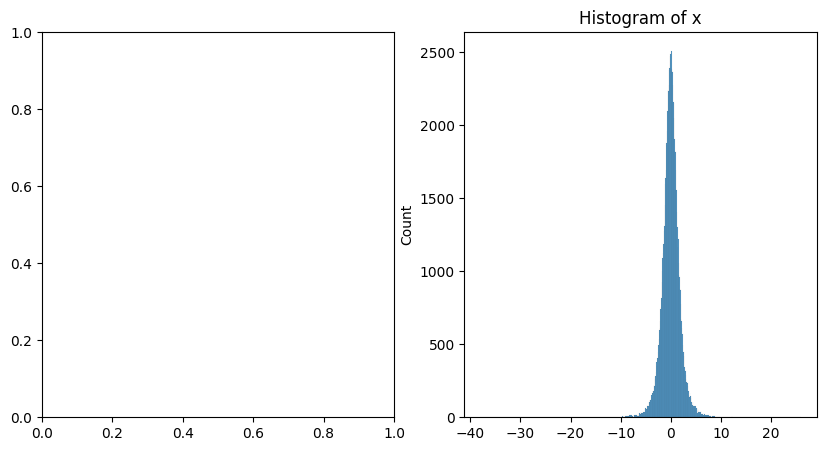

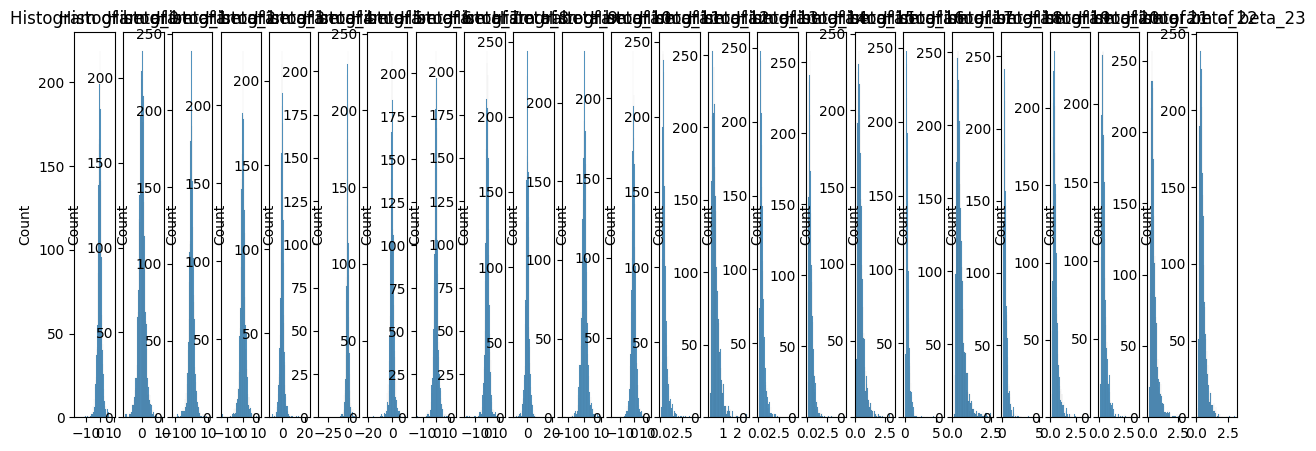

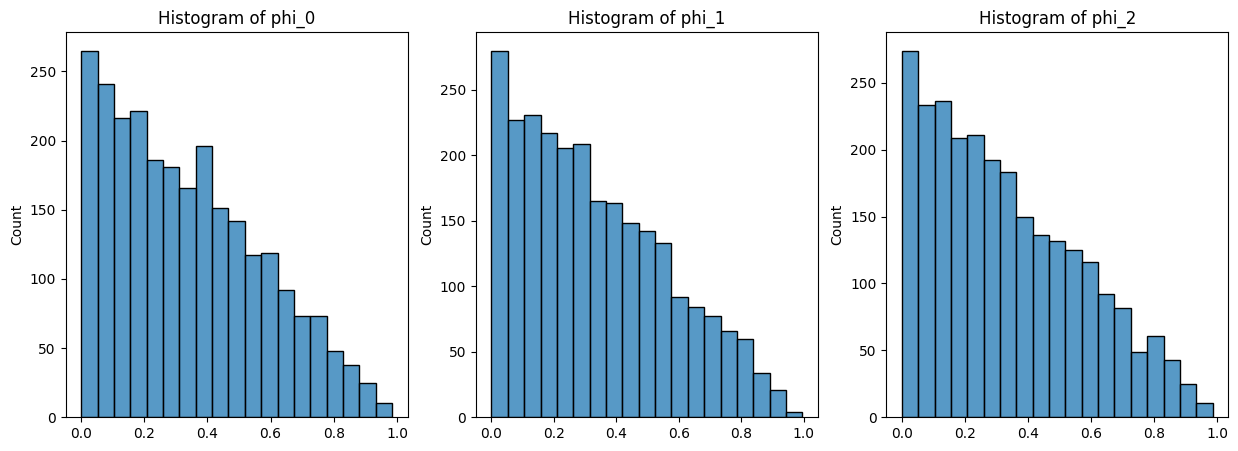

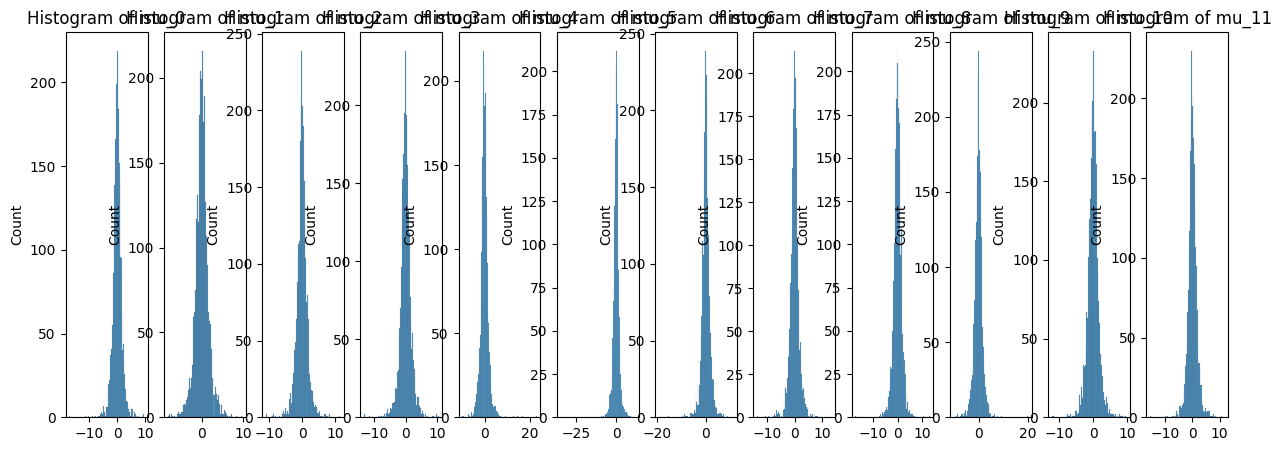

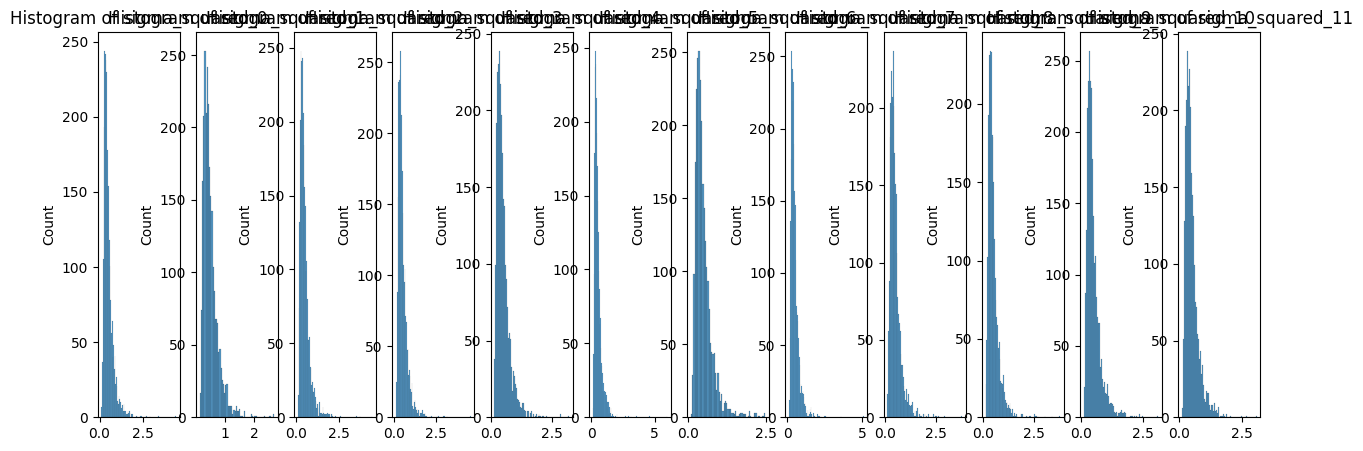

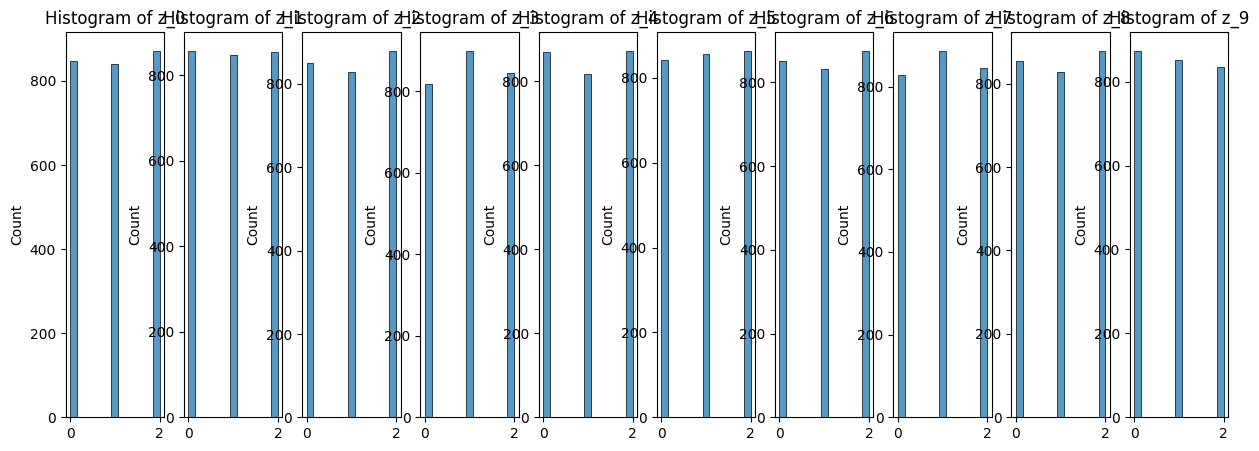

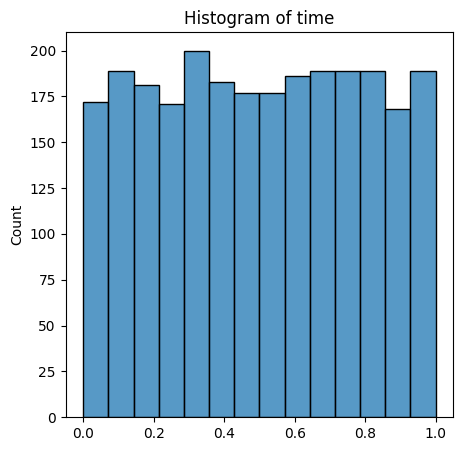

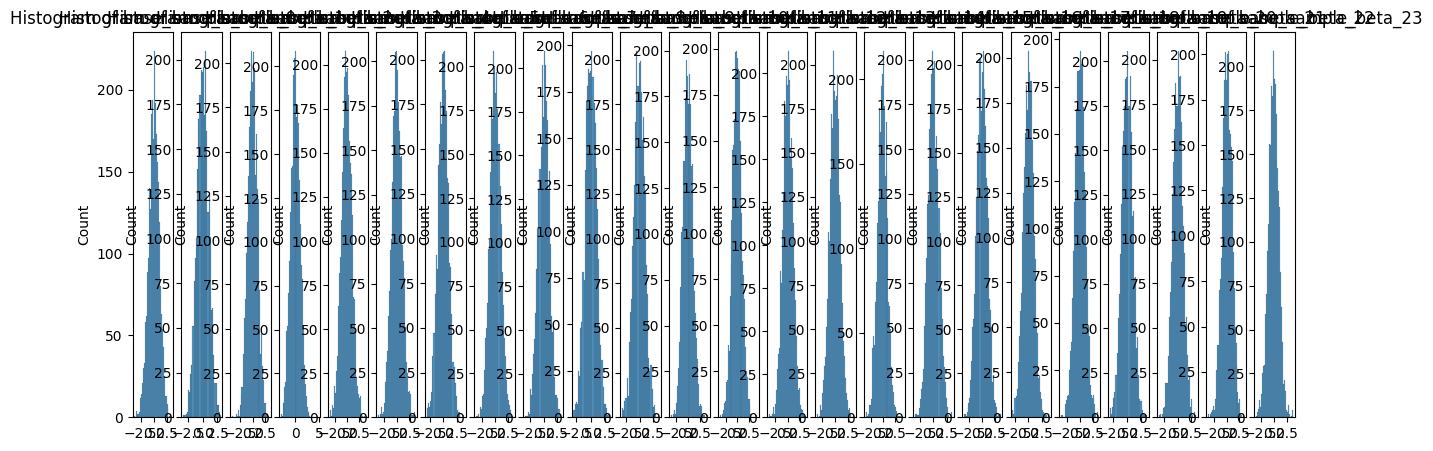

####################################################################################################
Epoch 99


100%|██████████| 10/10 [00:01<00:00,  6.95it/s]


{'X': {'mean': tensor(-0.0022), 'variance': tensor(3.4872), 'min': tensor(-44.2054), 'max': tensor(25.6424), 'mean_mean': tensor([-0.0214, -0.0042,  0.0369, -0.0202]), 'variance_mean': tensor([2.0928, 1.8211, 1.9662, 2.2172]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2465), 'variance': tensor(1.5337), 'min': tensor(-43.0995), 'max': tensor(26.8087), 'mean_mean': tensor(0.2465), 'variance_mean': tensor(1.6016), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3276, 0.3371, 0.3352])
Variance: tensor([0.0560, 0.0565, 0.0556])
Min: tensor([6.3925e-05, 2.4690e-04, 9.1651e-05])
Max: tensor([0.9557, 0.9941, 0.9822])
Mean of means: 0.3333333730697632
Mean of variances: 0.08403117954730988
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([-0.0805, -0.0137, -0.0107,  0.0426,  0.0285,  0.0252,  0.0634, -0.0762,
        -0.0256,  0.0002,  0.0159, -0.0491])
Variance: tensor([3.3338, 2.6446, 2.7402, 3.2324, 3.0010, 2.5378, 

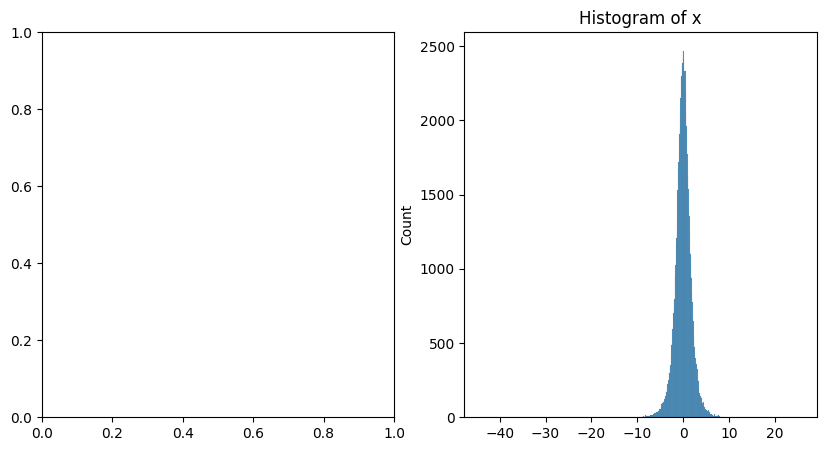

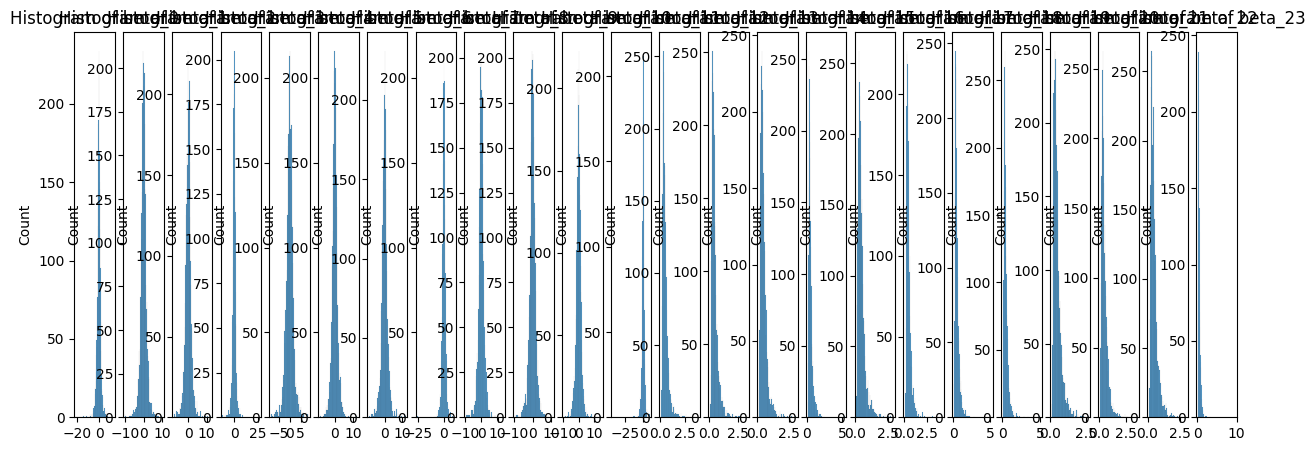

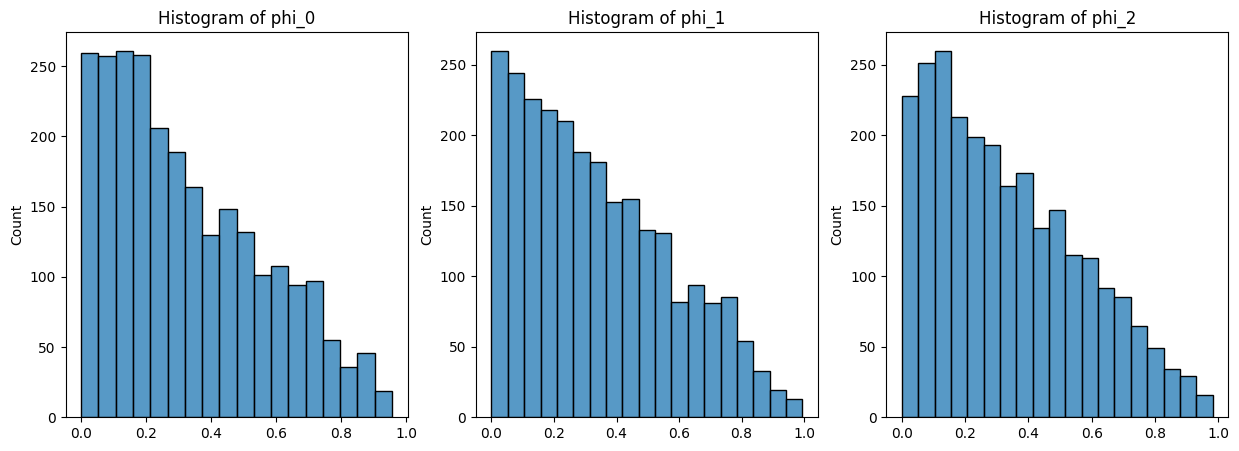

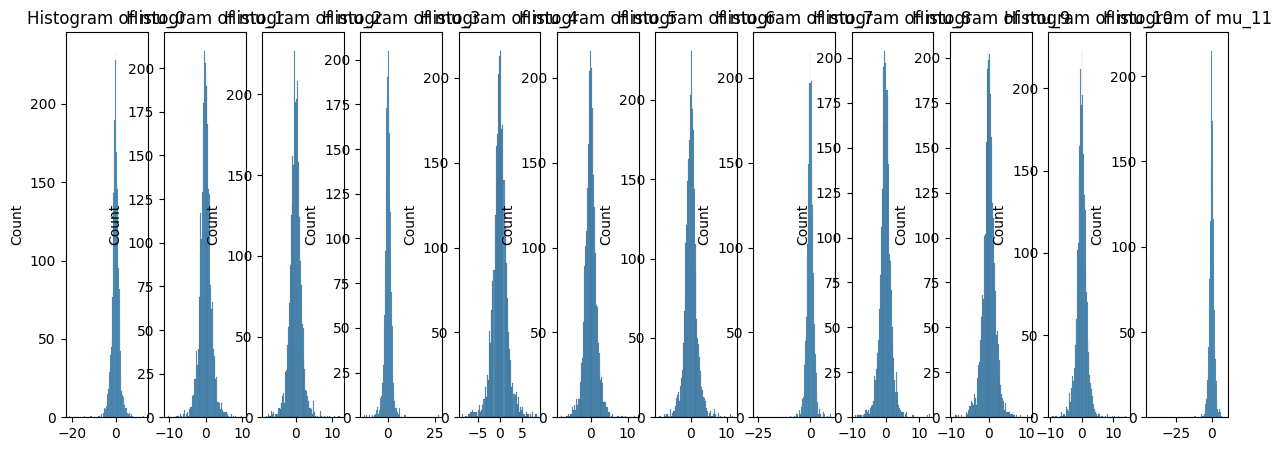

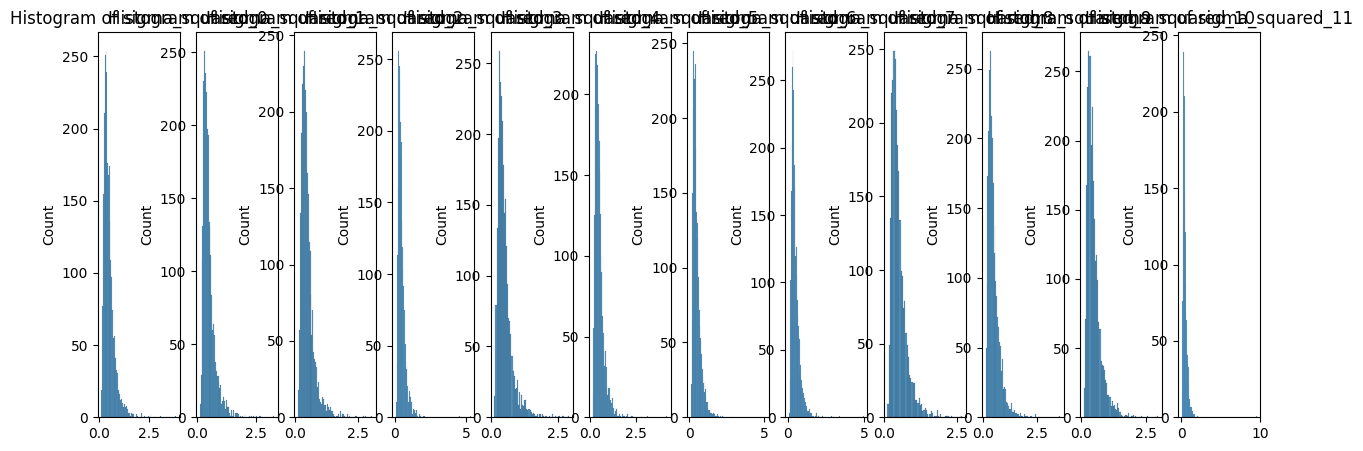

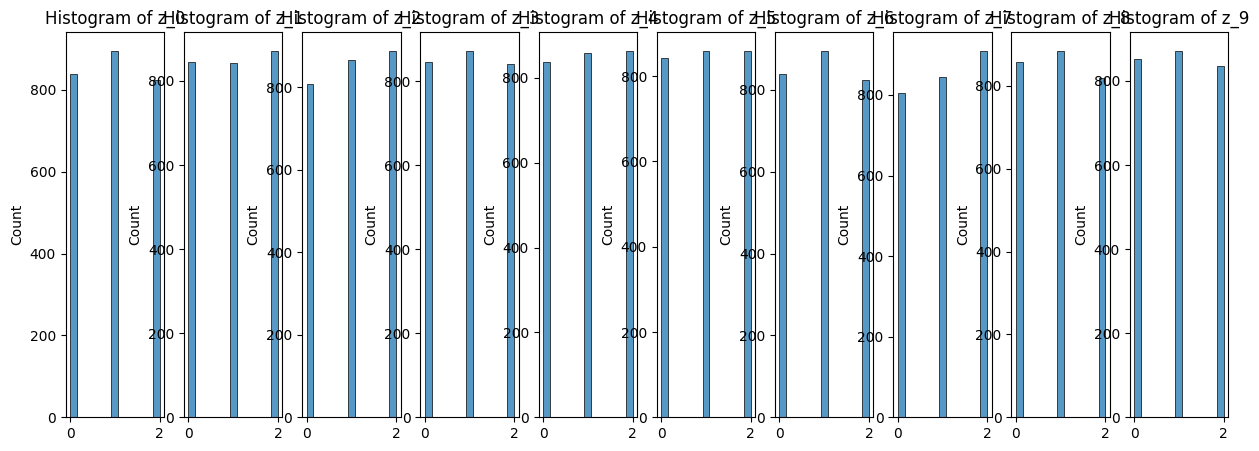

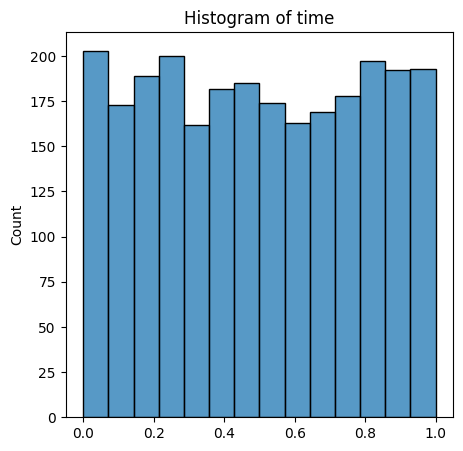

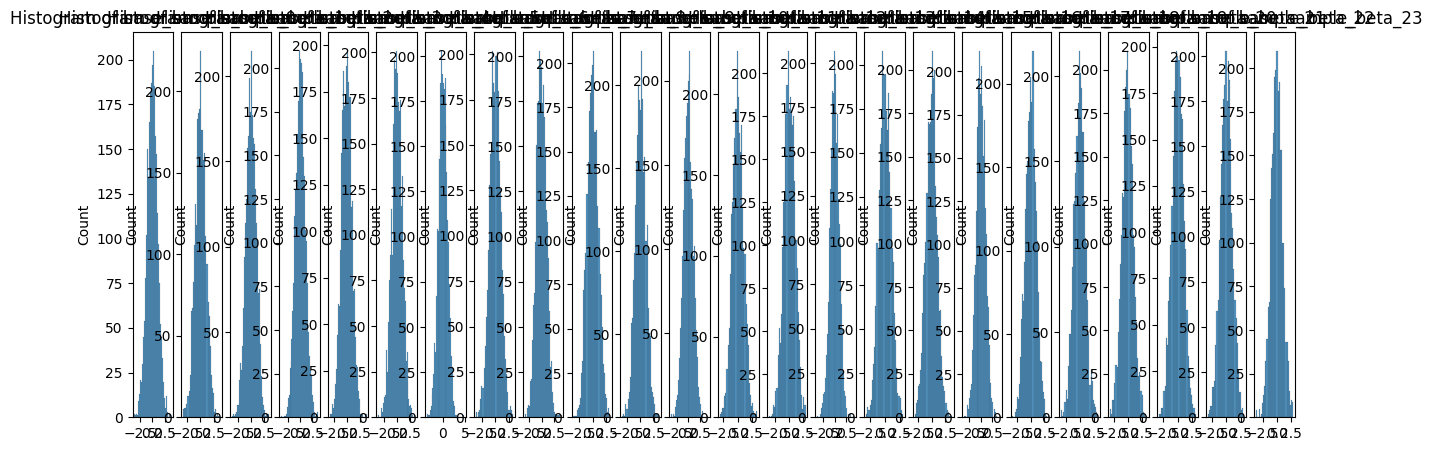

[{'X': {'mean': tensor(0.0017),
   'variance': tensor(3.6286),
   'min': tensor(-37.9607),
   'max': tensor(25.9002),
   'mean_mean': tensor([ 0.0016,  0.0203, -0.0003, -0.0147]),
   'variance_mean': tensor([2.1063, 2.1322, 1.9874, 1.9355]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2493),
   'variance': tensor(1.5763),
   'min': tensor(-34.9518),
   'max': tensor(23.1483),
   'mean_mean': tensor(0.2493),
   'variance_mean': tensor(1.6434),
   'min_mean': None,
   'max_mean': None}},
 {'X': {'mean': tensor(-0.0022),
   'variance': tensor(3.4872),
   'min': tensor(-44.2054),
   'max': tensor(25.6424),
   'mean_mean': tensor([-0.0214, -0.0042,  0.0369, -0.0202]),
   'variance_mean': tensor([2.0928, 1.8211, 1.9662, 2.2172]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2465),
   'variance': tensor(1.5337),
   'min': tensor(-43.0995),
   'max': tensor(26.8087),
   'mean_mean': tensor(0.2465),
   'variance_mean': tensor(1.6016),
   'min

In [378]:
data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1],
    p = P,
    n = N,
    used_batch_samples = 10
)

In [379]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
)

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 49971200 and 24985600 respectively


In [380]:
sample_batch = next(iter(epoch_loader[0][0]))
sample_batch.keys()

dict_keys(['phi', 'mu', 'sigma_squared', 'z', 'x', 'beta', 'time', 'base_sample_beta'])

In [381]:
sample_batch["x"].shape, sample_batch["beta"].shape

(torch.Size([1024, 10, 4]), torch.Size([1024, 24]))

In [382]:
2*K

6

In [383]:
"""
model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 512,
    d_model_decoder = 512,
    n_heads_encoder = 8,
    n_heads_decoder = 8,
    d_ff_encoder = 1024,
    d_ff_decoder = 1024,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 512,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 512,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)
"""

model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = P,
    n_input_features_decoder = 2*P*K,
    d_model_encoder = 16,
    d_model_decoder = 16,
    n_heads_encoder = 1,
    n_heads_decoder = 1,
    d_ff_encoder = 16,
    d_ff_decoder = 16,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 16,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P*K,
    d_final_processing = 16,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)

In [384]:
loss_fun = CFMLossOT2(
    sigma_min=1e-4
)

In [385]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = OneCycleLR(opt,
                       max_lr = 5e-4,
                       epochs = N_EPOCHS,
                       steps_per_epoch = N_SAMPLES_PER_EPOCH//BATCH_SIZE,
                       pct_start = 0.1,
                       div_factor=25.0,
                       final_div_factor=1e4)

#scheduler = ReduceLROnPlateau(opt)

additional_evals = {
}



In [386]:
trainer = TrainerCurriculumCNF_LatentFactor(
    model = model,
    optimizer=opt,
    scheduler = scheduler,
    loss_function=loss_fun,
    epoch_loader = epoch_loader,
    evaluation_functions= additional_evals,
    n_epochs = N_EPOCHS,
    early_stopping_patience = 200,
    schedule_step_on = "batch",
    save_path = None,
    coupling = None,
    use_same_timestep_per_batch = False,
    use_train_mode_during_validation = False,
    max_gradient_norm = 1.0

)

In [387]:
trainer.validate()

100%|██████████| 49/49 [00:27<00:00,  1.77it/s]


{'loss_mean': 2.8746023178100586,
 'loss_median': 2.8678760528564453,
 'loss_std': 0.05739210918545723}

In [388]:
r = trainer.train()

Curriculum parameters: {'n': 10, 'p': 4, 'k': 3, 'batch_size': 1024, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 1.0, 'lambda1': 3.0} at iteration 0


 15%|█▌        | 37/244 [00:37<03:27,  1.00s/it] 


KeyboardInterrupt: 

In [392]:
full_model = ModelToPosteriorCNF(
    model = model.eval(),
    sample_name = "beta",
    sample_shape = (2*P*K,),
    n_samples=1000,
    batch_size = BATCH_SIZE,
    solve_adjoint = True,
    atol = 10,
    rtol = 10,
    #device = torch.device("cpu")
)

benchmark_params_ppgrogram = data_generator.curriculum.get_params(-1)
del benchmark_params_ppgrogram["batch_size"]
print(f"params for pprogram: {benchmark_params_ppgrogram}")

pprogram1 = make_gmm_program_diagonal(**benchmark_params_ppgrogram)

pprogram1_x = return_only_x(pprogram1)



params for pprogram: {'n': 10, 'p': 4, 'k': 3, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 1.0, 'lambda1': 3.0}


In [393]:
test_batch = next(iter(epoch_loader[0][1]))
x_test = test_batch["x"]

In [394]:
x_test.shape

torch.Size([1024, 10, 4])

In [396]:
samples = full_model.sample_posterior(x_test[0])

0it [00:00, ?it/s]


In [397]:
samples["beta"].shape

torch.Size([1000, 24])

In [398]:
hmc = Hamiltionian_MC(
    pprogram=pprogram1_x,
    n_samples=500,
    n_warmup=500
)

models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000)

In [405]:
evaluation = Evaluate(
    posterior_model = full_model,
    evaluation_loader = trainer.testset,
    comparison_models= [models[1]],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [406]:
evaluation.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:28<00:28, 28.99s/it]

....................


 93%|█████████▎| 93/100 [00:00<00:00, 465.23it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 458.97it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

 49%|████▉     | 49/100 [00:00<00:00, 485.52it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 269.10it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

Comparison to ground truth:

Summarized results:


,Model,GT,Mean_joint_Wasserstein_distance with metric euclidean,Mean_joint_MMD,Mean_joint_cst_roc_auc,Mean_gt_parameter_Perplextiy,Mean_gt_parameter_MAP diff,Mean_gt_parameter_Mean diff,Std_joint_Wasserstein_distance with metric euclidean,Std_joint_MMD,Std_joint_cst_roc_auc,Std_gt_parameter_Perplextiy,Std_gt_parameter_MAP diff,Std_gt_parameter_Mean diff
0,<PFNExperiments.LinearRegression.Models.ModelT...,gt,7762.435059,7.129683,NaN,-4.780001e+07,1082.160489,1082.330933,0.570381,0.000016,NaN,5.559403e+06,3.049678,3.018151
1,Variational Inference with guide: _bound_parti...,gt,16.527327,3.759732,NaN,-9.599322e+01,0.758039,0.771289,0.278059,0.022806,NaN,4.052452e+01,0.273719,0.209220


P-values:


,Model 1,Model 2,joint_Wasserstein_distance with metric euclidean_p-value,joint_MMD_p-value,joint_cst_roc_auc_p-value,gt_parameter_Perplextiy_p-value,gt_parameter_MAP diff_p-value,gt_parameter_Mean diff_p-value
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,0.5,0.5,0.5



Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,7762.277588,7.742183,1.0,21.933085,3.371748e-07,0.0


P-values:


""


{'summarized_results': {'comparison_to_gt':                                                Model  GT  \
  0  <PFNExperiments.LinearRegression.Models.ModelT...  gt   
  1  Variational Inference with guide: _bound_parti...  gt   
  
     Mean_joint_Wasserstein_distance with metric euclidean  Mean_joint_MMD  \
  0                                        7762.435059            7.129683   
  1                                          16.527327            3.759732   
  
     Mean_joint_cst_roc_auc  Mean_gt_parameter_Perplextiy  \
  0                     NaN                 -4.780001e+07   
  1                     NaN                 -9.599322e+01   
  
     Mean_gt_parameter_MAP diff  Mean_gt_parameter_Mean diff  \
  0                 1082.160489                  1082.330933   
  1                    0.758039                     0.771289   
  
     Std_joint_Wasserstein_distance with metric euclidean  Std_joint_MMD  \
  0                                           0.570381          0.000016   

In [407]:
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor, PreprocessorClassification

In [408]:
from PFNExperiments.Evaluation.RealWorldEvaluation.Preprocess_multivariate_GMM import Preprocessor_GMM_multivariate
from PFNExperiments.Evaluation.RealWorldEvaluation.GetDataOpenML import GetDataOpenML
getdata = GetDataOpenML(
    preprocessor = Preprocessor_GMM_multivariate(
        N_datapoints = N,
        P_features = P,
        x_mean = 0.0,
        x_var = 1.0,
    ),
    save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/PFNs/Repository/PFNExperiments/Evaluation/RealWorldEvaluation/DatasetsOpenML/Tabular_benchmark_numerical_regression.pkl",
    benchmark_id = 336
)
datasets = getdata.get_data()

In [409]:
comparison_models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000)

In [414]:
from PFNExperiments.Evaluation.RealWorldEvaluation.EvaluateRealWorld import EvaluateRealWorld


eval = EvaluateRealWorld(
    
    posterior_model = full_model,
    evaluation_datasets = datasets,
    comparison_models = comparison_models[1:3],
    n_evaluation_cases = 2,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [415]:
eval.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:37<00:37, 37.67s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:40<00:40, 40.20s/it]

....................


Sampling posterior: 100%|██████████| 2/2 [01:16<00:00, 38.45s/it]


Comparison to ground truth:

Summarized results:

Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,7721.208740,7.742185,1.000,0.495458,6.743496e-07,0.000000
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,7721.141846,7.742185,1.000,0.466456,0.000000e+00,0.000000
2,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,1.105644,0.044285,0.695,0.077869,2.030804e-03,0.014849


P-values:


,Pair 1: Model A,Pair 1: Model B,Pair 2: Model A,Pair 2: Model B,Wasserstein_distance with metric euclidean_p-value,MMD_p-value,cst_roc_auc_p-value
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.698535,1.000000,1.000000
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.245278,0.220671
2,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.220671,0.220671


{'summarized_results': {'model_comparison_among_each_other':                                              Model 1  \
  0  <PFNExperiments.LinearRegression.Models.ModelT...   
  1  <PFNExperiments.LinearRegression.Models.ModelT...   
  2  Variational Inference with guide: _bound_parti...   
  
                                               Model 2  \
  0  Variational Inference with guide: _bound_parti...   
  1  Variational Inference with guide: _bound_parti...   
  2  Variational Inference with guide: _bound_parti...   
  
     Mean_Wasserstein_distance with metric euclidean  Mean_MMD  \
  0                                      7721.208740  7.742185   
  1                                      7721.141846  7.742185   
  2                                         1.105644  0.044285   
  
     Mean_cst_roc_auc  Std_Wasserstein_distance with metric euclidean  \
  0             1.000                                        0.495458   
  1             1.000                                     